In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [90]:
data = np.array([
    [3, 1, 60],
    [4, 1, 55],
    [5, 2, 66],
    [6, 2, 93],
    [7, 1, 48],
    [8, 1, 51]
])

df = pd.DataFrame(data, columns=["Experience", "Degree", "Salary"])
df


,Experience,Degree,Salary
0,3,1,60
1,4,1,55
2,5,2,66
3,6,2,93
4,7,1,48
5,8,1,51


In [91]:
X = df[["Experience", "Degree"]].values
y = df["Salary"].values.reshape(-1, 1)

N, INPUT_DIM = X.shape
OUTPUT_DIM = 1

X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
y_norm = (y - y.mean()) / y.std()


In [92]:
def train_model(X, y, lr=0.01, epochs=100, lam=0.0, mode="linear"):
    N, D = X.shape
    W = 0.01 * np.random.randn(D, 1)
    b = 0.0

    losses = []

    for epoch in range(epochs):
        y_pred = X @ W + b
        mse = (1/N) * np.sum((y - y_pred)**2)
        if mode == "linear":
            reg = 0
        elif mode == "ridge":
            reg = lam * np.sum(W**2)
        elif mode == "lasso":
            reg = lam * np.sum(np.abs(W))
        else:
            raise ValueError("unknow")

        loss = mse + reg
        losses.append(loss)
        dW = -(2/N) * (X.T @ (y - y_pred))

        if mode == "ridge":
            dW += 2 * lam * W
        elif mode == "lasso":
            dW += lam * np.sign(W)

        db = -(2/N) * np.sum(y - y_pred)
        W -= lr * dW
        b -= lr * db

    return W, b, losses


In [93]:
NUM_EPOCHS = 100
LR = 0.05
LAMBDA = 0.1

models = {}

W_lin, b_lin, loss_lin = train_model(X_norm, y_norm, LR, NUM_EPOCHS, 0, "linear")
models["Linear"] = (W_lin, b_lin, loss_lin)

W_ridge, b_ridge, loss_ridge = train_model(X_norm, y_norm, LR, NUM_EPOCHS, LAMBDA, "ridge")
models["Ridge"] = (W_ridge, b_ridge, loss_ridge)

W_lasso, b_lasso, loss_lasso = train_model(X_norm, y_norm, LR, NUM_EPOCHS, LAMBDA, "lasso")
models["Lasso"] = (W_lasso, b_lasso, loss_lasso)


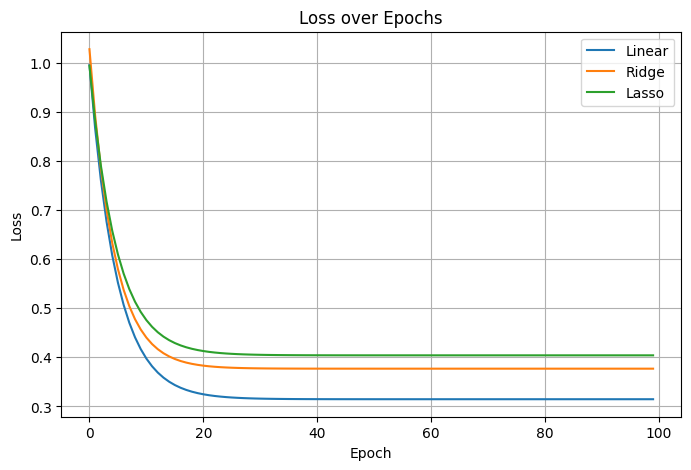

In [94]:
plt.figure(figsize=(8,5))
plt.plot(loss_lin, label="Linear")
plt.plot(loss_ridge, label="Ridge")
plt.plot(loss_lasso, label="Lasso")
plt.legend()
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [95]:
for name, (W, b, _) in models.items():
    print(f"\n{name} Regression:")
    print("W =", W.ravel())
    print("b =", b)



Linear Regression:
W = [-0.12701302  0.81803947]
b = 6.66133814775094e-17

Ridge Regression:
W = [-0.11546813  0.74368538]
b = 6.66133814775094e-17

Lasso Regression:
W = [-0.07701425  0.76804086]
b = 7.21644966006352e-17


In [96]:
#dự đoán
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
y_mean = y.mean()
y_std = y.std()

def predict_real_value(x_raw, W, b):
#input
    x_norm = (x_raw - X_mean) / X_std

#guess
    y_pred_norm = x_norm @ W + b

#y_real = y_norm * std + mean
    y_pred_real = y_pred_norm * y_std + y_mean

    return float(y_pred_real)

test1 = np.array([7, 1])
test2 = np.array([7, 2])

print("Experience=7")
for name, (W, b, _) in models.items():
    p1 = predict_real_value(test1, W, b)
    p2 = predict_real_value(test2, W, b)
    print(f"{name}: Degree=1 -> Salary={p1:.2f} | Degree=2 -> Salary={p2:.2f}")

Experience=7 salary:
Linear: Degree=1 -> Salary=51.83 | Degree=2 -> Salary=77.83
Ridge: Degree=1 -> Salary=52.77 | Degree=2 -> Salary=76.40
Lasso: Degree=1 -> Salary=53.02 | Degree=2 -> Salary=77.43


/tmp/ipython-input-633322002.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(y_pred_real)
